# Introduction to Computer Vision


To navigate up and down, you can use the up and down arrow keys on your keyboard<br />
To execute code in this workbook, select the code block and press **Shift+Enter** <br />
To edit the code block, press enter. 

#### The codes in this workbook are cumulative. (Variables defined continue to be available until the notebook is closed) <br />
So do start from the top and work your way down to avoid unexpected results!


For more help on using Jupyter Notebook, you can click on Help > User Interface Tour in the menu above, <br />
or visit https://jupyter-notebook.readthedocs.io/en/stable/ui_components.html

Experiment and test out your ideas, for that is one of the fastest ways to learn!

## 1. How do computers see?
When you played the icebreaker earlier, your classmate could not talk but you could easily identify your classmate based on what was written on his/her wristband. You used your eyes to see, and your brain processed that information. 

Can we get a computer to do something similar? 
<br />
Where do we even start?

Similar to how we recognized our friends, there are 2 parts.<br />
1) Seeing with your eyes<br />
2) Making sense of what we see (recognizing your friend, or what he/she wrote or drew on the wristband)


### Getting started with code

In this session, we will be using the Intel® Distribution for Python and OpenCV.

Another useful Python library will be the Numpy library, which is very useful for quick array manipulations. Images are actually stored as arrays/matrices of pixels, and hence, Numpy would be very useful for helping us to do faster image processing.

If you have no prior experience with Python and Numpy, <br />
you can get a good introduction online at https://www.datacamp.com/courses/intro-to-python-for-data-science

To execute the code block below, select it and press **Shift+Enter**  <br />
The results of your execution will be printed directly below the code block. In this case, it will show you your installed version of OpenCV and Python.

### Importing your Libraries

In [3]:
def penjumlahan():
    bil1 = int(input("Masukan angka A: "))
    bil2 = int(input("Masukan angka B: "))
    jmlh = bil1 + bil2
    print("Jumlah  =", jmlh)

def pengurangan():
    bil1 = int(input("Masukan angka pertama: "))
    bil2 = int(input("Masukan angka kedua: "))
    jmlh = int(bil1 - bil2)
    print("Jumlah =", jmlh)



while True:
    print("""
    1. Penjumlahan
    2. Pengurangan
    3. perkalian
    """)

    pilih = int(input("pilih: "))


    if pilih == 1:
      penjumlahan()
      

    elif pilih == 2:
      pengurangan()

    elif pilih == 3:
      print("terimakasiih")
      

   


    1. Penjumlahan
    2. Pengurangan
    3. Perkalian
    4. Pembagian
    
Jumlah  = 20

    1. Penjumlahan
    2. Pengurangan
    3. Perkalian
    4. Pembagian
    


### 1.1 Seeing. Let's display our first picture!

In [ ]:
img = cv2.imread("[Dataset] Module 20 images/image001.png")   #Load the image file into memory
cv2.imshow("Image", img)                  #Display that image

cv2.waitKey(0)                            #Cleanup after any key is pressed
cv2.destroyAllWindows()

#### After running the code block above, check out your windows to see if the image has been produced!

Let's find out what's the size of this image!

In [ ]:
print (img[:,:,2].shape)

(600, 800)


Great! You have used OpenCV to read your image and display it on another window. 

However, we have also learnt in acquire stage that we can use another library to show the image on this Notebook. Do you remember what library is it? 

### Task 1: Import matplotlib library and display the image on this notebook.

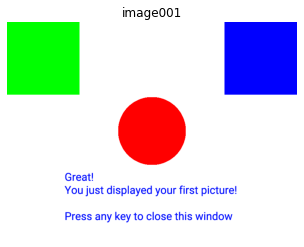

In [ ]:
# your code here
from matplotlib import pyplot as plt # import matplotlib

img_1 = cv2.imread("[Dataset] Module 20 images/image001.png")   #Load the image file into memory
img_1 = cv2.cvtColor(img_1,cv2.COLOR_BGR2RGB)
plt.imshow(img_1)
plt.title('image001')
plt.axis('off')
plt.show()

Is your color correct? If not, remember to use the right command to change the color space. 

Do you think the computer understands what is in the image at this stage?

### 1.1b Instead of just a picture, how about using your webcam?


In [ ]:
camera = cv2.VideoCapture(0) #create a VideoCapture object with the 'first' camera (your webcam)

while(True):
    ret, frame = camera.read()             # Capture frame by frame   
    cv2.imshow('Press Spacebar to Exit',frame)              # Display the frame
    
    if cv2.waitKey(1) and 0xFF == ord(' '):  # Stop if spacebar is detected
        break

camera.release()                           # Cleanup after spacebar is detected.
cv2.destroyAllWindows()

Congratulations! Did you see yourself on the screen? Are you getting excited with ideas?

### 1.2 Making sense of what we see

So we have quickly achieved the first part of seeing. Now the computer needs to make sense of what it sees.

Remember Numpy? In OpenCV, images are stored as Numpy Arrays.

These arrays have built in methods that you can use to quickly analyze your image.<br />
For example, **.shape** would tell you the dimensions of the Numpy array where the image is stored. (height, width, channels)<br />
There are also various other advanced array manipulation techniques, but we'll keep it simple for now.

By default, there are 3 channels to store the pixel intensities of Blue, Green, and Red. This is the default colour space used by OpenCV.

For the image you displayed above, What are the dimensions? What colour is it at different parts of the image? How are colour intensities represented?

<img src="[Dataset] Module 20 images/image001.png" alt="Drawing" style="width: 400px; border:1px solid; float:left;"/>
<div style="clear: both;"></div>

Try understanding the image for yourself below!


#### What are the dimensions of this image?

In [ ]:
print(img.shape)         #What are the dimensions of this image? 
                         #What is the width, What is the height, How many channels are there?
                         #Hint: Images are represented in Numpy arrays as (height,width,channels)

#### What is the color of the top left corner of the image? 

In [ ]:
print(img[0,0])          #What is the color of the top left corner of the image? Notice that array indexing starts from 0
                         #Hint: the channels are represented as Blue,Green,Red by default

### Task 2: Find out the color of the top right corner of the image.
What is the color of the top right corner of the image? 

In [ ]:
print(img[0,799])        #What is the color of the top right corner of the image? 
                         #Hint: Notice that the rightmost pixel is 799 not 800. Numpy array indexing starts from 0.

### Task 3: Find out the color of the middle of the image.
What is the color in the middle of the image?

In [ ]:
print(img[300,400])      #What is the color in the middle of the image?

Do you think the computer understands that there are squares and circles in the image at this stage?<br />
Or is it only aware that there are rows and rows of pixel intensities that seem to have values from 0 to 255?

Yes, by the way, the pixel intensities from 0 to 255 are basically how much of a particular colour is present. <br />
0 means that the intensity is 0 (basically dark), while 255 means that it is full of that colour.

So, (0,0,0) would be black, and (255,255,255) would be white. How would you represent blue, green or red?

## 2. Image Processing

We have discovered that a computer sees images as arrays of pixel intensities, <br />
and it is up to the computer vision developer (you) to make sense of that image.

Let us dig into some of the more common image processing techniques that you may find useful. <br />
For a more detailed discovery, some links will be provided at the end for you to dig even deeper.

Oh wait, before that, can you think of some examples of how computer vision is used in the real world today? You will be discussing that as a class later so you might want to make some notes as you think.

### 2.1 Color Spaces/ organization of colors

We have been using the Blue, Green and Red color space on the images earlier. 

What if we didn't need all the colors and just needed to know how light or dark an image was? We can convert the photo into grayscale. 

Do you remember how are greyscale images represented in Numpy?

In [ ]:
img = cv2.imread("[Dataset] Module 20 images/image001.png")
grey = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) #Convert color from BGR to grayscale
cv2.imshow("Grey",grey)

cv2.waitKey(0)                            # Cleanup after any key is pressed
cv2.destroyAllWindows()

### Task 4: Now show the grayscale picture on this notebook. 
Use a new variable (not img).

In [ ]:
img_1 = cv2.imread('[Dataset] Module 20 images/image001.png',0) # the number zero opens the image as a grayscale image
plt.imshow(img_1, cmap = 'gray', interpolation = 'bicubic')
plt.title('grayscale')
plt.axis('off')
plt.show()

### Task 5: display the grayscale array shape. 
What number do you expect to see?

In [ ]:
print(grey.shape)                         # Are these dimensions different from img.shape earlier?

Is there less memory being used to store the image now that everything is in greyscale? <br />
Does this mean that processing this image would potentially be faster since it has 1/3 the size of the original array?

### Task 6: Find out the color of the top left corner of the image.
What is the color of the top left corner of the image?

In [ ]:
print(grey[0,0])          # What is the color of the top left corner of the image? Notice that array indexing starts from 0
                          # How does this compare to your previous finding above?

### Task 7: Find out the color of the top right corner of the image.
What is the color of the top right corner of the image?

In [ ]:
print(grey[0,799])        # What is the color of the top right corner of the image? 
                          # How does this compare to your previous finding above?

Fun Fact: Do some colors actually appear darker than others when converted to greyscale? 
You can read up more about the different color spaces at https://docs.opencv.org/4.0.0/de/d25/imgproc_color_conversions.html

We will not be going too deep into the other color spaces, but if you are interested, do read up the link above. And when you have more questions, you can use the Internet to help you.

### 2.2 Thresholding, Masking and Region of Interest
Earlier, we saw how some colours were darker than others. What if we were only interested in a part of the picture that was very dark or very light? Could we filter out just the square on the top right of the screen?

**Technique 1: Greyscale Intensity**

In [ ]:
# Recall that the square on the top right had a pixel intensity of 29
# Now everything with a value greater than 29 will become 255 (white)
# This means that we are setting a treshold value of 29

ret,thresholded = cv2.threshold(grey,29,255,cv2.THRESH_BINARY)  
cv2.imshow("Thresholded",thresholded)

cv2.waitKey(0)                            # Cleanup after any key is pressed
cv2.destroyAllWindows()

The square that we want appears black, while the other parts of the image appears white. We can now focus on this area for further processes. 

The area we want to focus on is usually called the Region of Interest (ROI)

### Task 8: What if you want the text, the circle and the middle and the box at the right to be captured (marked black)?

In [ ]:
ret,thresholded = cv2.threshold(grey,100,255,cv2.THRESH_BINARY)  
cv2.imshow("Thresholded",thresholded)

cv2.waitKey(0)                            # Cleanup after any key is pressed
cv2.destroyAllWindows()

Let's continue working with treshold value of 29.

Usually, we would want the Regions of Interest (ROI) to be white, and the other areas black instead. Let us try:

In [ ]:
ret,thresholded = cv2.threshold(grey,29,255,cv2.THRESH_BINARY_INV)    #we use cv2.THRESH_BINARY_INV instead of cv2.THRESH_BINARY
cv2.imshow("Thresholded",thresholded)

cv2.waitKey(0)                            # Cleanup after any key is pressed
cv2.destroyAllWindows()

### Task 9: What if you want the text, the circle and the middle and the box at the right to be the ROI (marked white)?

In [ ]:
ret,thresholded = cv2.threshold(grey,100,255,cv2.THRESH_BINARY_INV)  
cv2.imshow("Thresholded",thresholded)

cv2.waitKey(0)                            # Cleanup after any key is pressed
cv2.destroyAllWindows()

What is the use of this? You may ask. 

Well, thresholding the Region of Interest (ROI) can allow us to use it as a mask to display on the original image.

### Mask?
**But what is a mask?**

Let us take a look at the illustration below:

<img src="[Dataset] Module 20 images/image001_masking.jpg" />

In the image (in the middle) above, you can see the mask for the blue square on the top right corner. When we apply that mask (image in the middle) to the original image (image on the left), only the blue square is left in the masked image (image on the right).

The mask layer helps to highlight the parts of the image that we are interested in. When the mask is applied to the image, only the parts that we are interested in are kept (white regions of the mask), while the remaining parts (black regions) of the image are discarded. 

Fun Fact: You can also see this concept at work in popular image editing softwares such as Adobe Photoshop, where you can apply "clipping masks".

In [ ]:
ret,thresholded = cv2.threshold(grey,29,255,cv2.THRESH_BINARY_INV)  

masked = cv2.bitwise_and(img, img, mask = thresholded) 
cv2.imshow("Masked", masked)

cv2.waitKey(0)                            # Cleanup after any key is pressed
cv2.destroyAllWindows()

Great! Did you manage to filter the blue square?

Ok, time for you to experiment and see what else you would like to threshold. Can you threshold just the Circle in the middle? How would you do that in grayscale layer?

Perhaps the grey layer is not the best layer to work with. Remember you have the original image:

<img src="[Dataset] Module 20 images/image001.png" alt="Drawing" style="width: 400px; border:1px solid; float:left;"/>
<div style="clear: both;"></div>

**Technique 2: Colours.**<br />
Remember that images are numpy arrays? And Numpy arrays can be filtered easily with advanced filters.

To make our lives easier, we may want to change the white in the background to black instead.

In [ ]:
mask = img.copy()                         # The masked image we are going to create. Initialize with a copy of initial image.
(b,g,r) = cv2.split(img)                  # Split the BGR images to single planes so that we can work on the channels separately
mask[(b==255)&(g==255)&(r==255)] = 0      # Change white background (when BGR channels are all 255) to 0 (black).

cv2.imshow("Mask",mask)

cv2.waitKey(0)                            # Cleanup after any key is pressed
cv2.destroyAllWindows()

Lets explore what the different layers of the mask looks like. They are the layers 0, 1 and 2 respectively:

In [ ]:
cv2.imshow("Blue Mask",mask[:,:,0])       # Notice how the words are blue also
cv2.waitKey(0)                            # Cleanup after any key is pressed
cv2.destroyAllWindows()

In [ ]:
cv2.imshow("Green Mask",mask[:,:,1])
cv2.waitKey(0)                            # Cleanup after any key is pressed
cv2.destroyAllWindows()

In [ ]:
cv2.imshow("Red Mask",mask[:,:,2])
cv2.waitKey(0)                            # Cleanup after any key is pressed
cv2.destroyAllWindows()

**Technique 3: Quick Numpy Array Manipulation based on position**

There are some artifacts around the words for this green layer. Can we clean it up?

In [ ]:
mask[300:,:,1]=0                          # Remember that the image is a matrix. Let's wipe the bottom half to black (0)
cv2.imshow("Green Mask",mask[:,:,1])
cv2.waitKey(0)                            # Cleanup after any key is pressed
cv2.destroyAllWindows()

If you do not remember the size of your image, which command can you use to find out?

In [ ]:
mask.shape

Now let's see if there are artifacts around the words for the red layer.

In [ ]:
cv2.imshow("Red Mask",mask[:,:,2])
cv2.waitKey(0)                            # Cleanup after any key is pressed
cv2.destroyAllWindows()

There are some artifacts around the words for this red layer also. Can we clean it up?

### Task 10: Clean up the artifacts around the words for this red layer.

In [ ]:
mask[410:,:,2]=0
cv2.imshow("Red Mask",mask[:,:,2])
cv2.waitKey(0)                            # Cleanup after any key is pressed
cv2.destroyAllWindows()

Now we can simply get the objects based on colour.

In [ ]:
#layer 2 is the red layer. Rememeber (B,G,R)
masked = cv2.bitwise_and(img,img,mask=mask[:,:,2])
cv2.imshow("Circle",masked)                   

cv2.waitKey(0)                            # Cleanup after any key is pressed
cv2.destroyAllWindows()

In [ ]:
#layer 1 is the green layer. Rememeber (B,G,R)
masked = cv2.bitwise_and(img,img,mask=mask[:,:,1])
cv2.imshow("Left Green Rectangle",masked)
cv2.waitKey(0)                            # Cleanup after any key is pressed
cv2.destroyAllWindows()

In [ ]:
#layer 0 is the blue layer. Rememeber (B,G,R)
masked = cv2.bitwise_and(img,img,mask=mask[:,:,0])
cv2.imshow("Right Blue Rectangle",masked)
cv2.waitKey(0)                            # Cleanup after any key is pressed
cv2.destroyAllWindows()

Notice that the words are also appearing not just the rectangle? This is because the words are also _blue!_

If you don't want the words to appear, you can "wipe" it away:

### Task 11: Wipe the words away!

In [ ]:
mask[300:,:,0]=0                          # Remember that the image is a matrix. Let's wipe the bottom half to black (0)
masked = cv2.bitwise_and(img,img,mask=mask[:,:,0])
cv2.imshow("Right Blue Rectangle",masked)
cv2.waitKey(0)                            # Cleanup after any key is pressed
cv2.destroyAllWindows()

We have spent quite a bit of time on masking, thresholding and regions of interest. There are different approaches you can use, whether it is by colour, or by pixel intensity, or by manipulating the Numpy Array (e.g. for accessing and modifying parts of the image). Do take some time to practice these techniques and try it on different images.

In computer vision, and in life, there are often multiple ways that you can reach the same objective. Can you think of more efficient ways to get your Region of Interest? 

### Tambahan

In [ ]:
camera = cv2.VideoCapture(1) #create a VideoCapture object with the 'first' camera (your webcam)

while(True):
    ret, frame = camera.read()             # Capture frame by frame 
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    #frame = cv2.flip(frame, 1)
    #ret,frame = cv2.threshold(frame,29,255,cv2.THRESH_BINARY)
    cv2.imshow('Press Spacebar to Exit',frame)              # Display the frame
    
    if cv2.waitKey(1) & 0xFF == ord(' '):  # Stop if spacebar is detected
        break

camera.release()                           # Cleanup after spacebar is detected.
cv2.destroyAllWindows()

In [ ]:
camera = cv2.VideoCapture(1) #create a VideoCapture object with the 'first' camera (your webcam)

while(True):
    ret, frame = camera.read()             # Capture frame by frame 
    h,w,c = frame.shape
    
    frame[h//2-10:h//2+10,w//2-10:w//2+10,:]=(0,255,0)
    #frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    #frame = cv2.flip(frame, 1)
    #ret,frame = cv2.threshold(frame,29,255,cv2.THRESH_BINARY)
    cv2.imshow('Press Spacebar to Exit',frame)              # Display the frame
    
    if cv2.waitKey(1) & 0xFF == ord(' '):  # Stop if spacebar is detected
        break

camera.release()                           # Cleanup after spacebar is detected.
cv2.destroyAllWindows()

### 2.3 Geometric Transformations. Resizing and Cropping

Moving on, perhaps the image is too big or too small, how might we resize it?

### Task 12: Make the 800x600 image into a 400x300 image

In [ ]:
#Lets make the 800x600 image into a 400x300 image
img = cv2.imread("[Dataset] Module 20 images/image001.png")   #Load the image file into memory
resized = cv2.resize(img,(400, 300))           # the second parameter is the desired dimensions you want (width,height)
cv2.imshow("Resized",resized)
cv2.waitKey(0)                            # Cleanup after any key is pressed
cv2.destroyAllWindows()

What is the shape now?

In [ ]:
print(resized.shape)

(300, 400, 3)


Note that the resize function can also be used to stretch the image, if you use a different aspect ratio.

### Task 13: Stretch the 800x600 image into a 200x300 image

In [ ]:
#Lets stretch the 800x600 image into a 200x300 image
resized = cv2.resize(img,(200, 300))           # the second parameter is the desired dimensions you want (width,height)
cv2.imshow("Resized",resized)
cv2.waitKey(0)                            # Cleanup after any key is pressed
cv2.destroyAllWindows()

### Cropping

### Task 14: Crop to obtain the top half of the image:

In [ ]:
cv2.imshow("Cropped Top",img[:300,:,:])
cv2.waitKey(0)                            # Cleanup after any key is pressed
cv2.destroyAllWindows()

### Task 15: Crop to obtain the right side of the image.

In [ ]:
cv2.imshow("Cropped Right",img[:,400:,:])
cv2.waitKey(0)                            # Cleanup after any key is pressed
cv2.destroyAllWindows()

You can play around with it. Cropping to a Region of Interest would be more useful. Let's move on to another very useful method for extracting a Region of Interest (ROI)

### 2.4 Contour Detection

This is what is commonly used to search for regions of interest, typically using a thresholded mask. 

**But what is a contour?**

You can think of contours as a [curve drawn along a boundary](https://docs.opencv.org/3.4/d4/d73/tutorial_py_contours_begin.html). 

To simplify this, think of all the black and white masks. There will be boundaries, sharp changes in color. Contours is a curve drawn along this boundary. 

Contour detection basically finds and returns these different groups as contours.

To illustrate, how many white color regions do you think are there in the image below?

<img src="[Dataset] Module 20 images/image001_3contours.png" style="width:400px; float:left;" />
<div style="clear: both;"></div>

Did you guess that there are 3 contours detected? Let us try to load that image and draw the contour outlines.

In [ ]:
greytest = cv2.imread("[Dataset] Module 20 images/image001_3contours.png",0)    # Load that image
contouroutlines = np.zeros(greytest.shape,dtype="uint8")    # Create a blank canvas for drawing detected contours

# Let's find the contours! https://docs.opencv.org/3.4/d3/dc0/group__imgproc__shape.html#ga17ed9f5d79ae97bd4c7cf18403e1689a
(cnts,_) = cv2.findContours(greytest, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

for (i, c) in enumerate(cnts):    
    cv2.drawContours(contouroutlines, [c], -1, 255, 1)  # For each contour, draw just the outline of the contours
                                                        # https://docs.opencv.org/3.4/d6/d6e/group__imgproc__draw.html#ga746c0625f1781f1ffc9056259103edbc
cv2.imshow("Contour Outlines",contouroutlines)          # Display the results
cv2.waitKey(0)                                          # Cleanup after any key is pressed
cv2.destroyAllWindows()

print("There are "+str(len(cnts))+" contours!")         # Print out the number of contours detected

There are 3 contours!


That was a simple example with just 3 contours. 

How many contours would you expect to find on our thresholded original image?

<img src="[Dataset] Module 20 images/image001_allcontours.png" style="width:400px; float:left;" />
<div style="clear:both;"></div>


First we will create the image using tresholding method

In [ ]:
grey = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

#We apply a threshold
(T, thresholded) = cv2.threshold(grey, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)
cv2.imshow("Thresholded",thresholded)

cv2.waitKey(0)                            # Cleanup after any key is pressed
cv2.destroyAllWindows()

Now we will find out the contour. How many do you think it will be? Look at the picture carefully!

In [ ]:
# Let's find the contours!
(cnts,_) = cv2.findContours(thresholded, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

mask = np.zeros(img.shape,dtype="uint8")  # Create a canvas for drawing detected contours
for (i, c) in enumerate(cnts):    
    cv2.drawContours(mask, [c], -1, (0,255,0), 1) 
    
cv2.imshow("Mask",mask)  
cv2.waitKey(0)                            # Cleanup after any key is pressed
cv2.destroyAllWindows()


print("There are "+str(len(cnts))+" contours!")

There are 78 contours!


Why are there 78 contours? That is because of the line of texts. 

Let us try to label the contours for us to visualize what is actually being counted.

Below, you will see how each letter tends to forms 1 contour. But notice how some letters like "i" is actually counted as 2 contours since the top of the "i" and the bottom of the "i" are not connected. Similarly for the exclamation mark.

The code below seems a little longer because code has been added for the annotations. You will understand the code better when you visit section 2.5 a little further below. In the meantime, do not worry about the code. Just run the code and see how the contours are counted. Take note of the red bounding boxes which have been drawn around each "contour".

In [ ]:
grey = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

#We apply a threshold
(T, thresholded) = cv2.threshold(grey, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)
cv2.imshow("Thresholded",thresholded)

# Let's find the contours!
(cnts,_) = cv2.findContours(thresholded, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = sorted(cnts, key=lambda cnts: cv2.boundingRect(cnts)[1])  #sort contours from top to bottom.

mask = cv2.merge([thresholded,thresholded,thresholded])  # Create a canvas for drawing detected contours
for (i, c) in enumerate(cnts):   #https://docs.opencv.org/3.1.0/dd/d49/tutorial_py_contour_features.html  
    #cv2.drawContours(mask, [c], -1, (255,255,255), -1) 
    (x, y, w, h) = cv2.boundingRect(c)                   # Get the x,y coordinates of the contour's bounding box 
    cv2.rectangle(mask, (x,y), (x+w,y+h), (0,0,255))     # Draw the bounding boxes in red

    cv2.putText(mask, ""+str(i+1), (x,y+28), cv2.FONT_HERSHEY_SIMPLEX, 0.25, (0,255,0), 1)
    
cv2.imshow("Mask",mask)  
cv2.waitKey(0)                            # Cleanup after any key is pressed
cv2.destroyAllWindows()


print("There are "+str(len(cnts))+" contours!")

There are 78 contours!


Want to find out more about contours? You can visit https://docs.opencv.org/3.3.1/d4/d73/tutorial_py_contours_begin.html to dig deeper. As always, do continue searching on the Internet because there is a treasure trove of information out there, and it will be very useful as you go deeper!

Tip: In the above examples, we used cv2.RETR_EXTERNAL to get the external contours. There are also other options that you can specify to get different types of contours. For example, cv2.RETR_LIST will list all contours and not just the external contours.

**Using Contours as Image Masks**

Remember we talked about image masks earlier? The contours can be used to create masks too! 

Set the last parameter for the drawContour function to -1 to create a fill (instead of an outline), and use it as a mask!

In [ ]:
(T, thresholded) = cv2.threshold(grey, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)
thresholded[410:,:]=0                     # Shortcut to remove the text since it is on the bottom half of the image!
#cv2.imshow("Thresholded",thresholded)

#How many contours do you think there are?
(cnts,_) = cv2.findContours(thresholded, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

mask = np.zeros(thresholded.shape,dtype="uint8")
for (i, c) in enumerate(cnts):    
    cv2.drawContours(mask, [c], -1, 255, -1)  #the last parameter defines the outline thickness. -1 will fill the contour
    
cv2.imshow("Mask",mask)
cv2.imshow("Masked Image",cv2.bitwise_and(img,img,mask=mask))  
cv2.waitKey(0)                            # Cleanup after any key is pressed
cv2.destroyAllWindows()


print("There are "+str(len(cnts))+" contours!")

There are 3 contours!


Did you find it easier than manually thresholding each colour?

### 2.5 Drawing Lines and Writing Texts

We actually did a bit of this in the contour exercise above, using a method called drawContour. Let us see how we can add lines and words into images, since we may want to annotate our images. Let's revisit the example in 2.4 and add labels to our contours!

Only the 3 lines that have changed are commented below. The other lines of code as similar to the example in 2.4 and you can refer to that example to recap what those lines of code do.

First, we get the bounding box for each contour, draw a rectangle around it, and then add the text to label each contour.

In [ ]:
greytest = cv2.imread("[Dataset] Module 20 images/image001_3contours.png",0)
contouroutlines = np.zeros(greytest.shape,dtype="uint8")

(cnts,_) = cv2.findContours(greytest, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

for (i, c) in enumerate(cnts):    
    cv2.drawContours(contouroutlines, [c], -1, 255, 1)

    # GET BOUNDING BOX OF EACH CONTOUR
    (x, y, w, h) = cv2.boundingRect(c)
    
    # DRAW A RECTANGLE AROUND EACH CONTOUR (I.E. DRAW THE BOUNDING BOX)
    cv2.rectangle(contouroutlines, (x, y), (x+w, y+h), (255,255,0), 2) 
    
    # ADD THE TEXT "COUNTOUR <>" TO EACH CONTOUR
    cv2.putText(contouroutlines, "Contour "+str(i+1), (x,y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 0), 2)

    
cv2.imshow("Contour Outlines",contouroutlines)          
cv2.waitKey(0)                                          
cv2.destroyAllWindows()

print("There are "+str(len(cnts))+" contours!")         

There are 3 contours!


For more details on writing text on screen, and drawing shapes such as rectangles and circles, you can visit https://docs.opencv.org/4.0.0/dc/da5/tutorial_py_drawing_functions.html

If you later create applications for object detection, you can use this method to annotate what you actually detect. Or you could also create your own art work and images using just code! 

Let's try to draw something from scratch:

**ACCESS DENIED**

In [ ]:
# Create an empty canvas (height,width,channels) - In this case: 3 colour channels, width 400, and height 300 
canvas_accessdenied = np.zeros((600,800,3),dtype="uint8")      

# Add a Hollow Rectangle at (x=100,y=230) with the colour (255,255,0), and line thickness 2 
cv2.rectangle(canvas_accessdenied, (100, 230), (700, 370), (255,255,0), 2)  

# Add your Text at (x=150,y=320) the colour (100,100,255), fint size 2, and line thickness 5 
cv2.putText(canvas_accessdenied, "ACCESS DENIED", (150,320), cv2.FONT_HERSHEY_SIMPLEX, 2, (100,100,255), 5)

cv2.imshow("Canvas Access Denied",canvas_accessdenied)  
cv2.waitKey(0)                            # Cleanup after any key is pressed
cv2.destroyAllWindows()

How about doing one for Access Granted?

**ACCESS GRANTED**

In [ ]:
# Create an empty canvas (height,width,channels) - In this case: 3 colour channels, width 400, and height 300 
canvas_accessgranted = np.zeros((600,800,3),dtype="uint8")      

# Add a Hollow Rectangle at (x=100,y=230) with the colour (255,255,0), and line thickness 2 
cv2.rectangle(canvas_accessgranted, (100, 230), (700, 370), (255,255,0), 2)  

# Add your Text at (x=130,y=320) the colour (255,100,100), fint size 2, and line thickness 5 
cv2.putText(canvas_accessgranted, "ACCESS GRANTED", (130,320), cv2.FONT_HERSHEY_SIMPLEX, 2, (255,100,100), 5)

cv2.imshow("Canvas Access Granted",canvas_accessgranted)  
cv2.waitKey(0)                            # Cleanup after any key is pressed
cv2.destroyAllWindows()

### Task 16: Create a canvas with 2 boxes. The first box says "ACCESS GRANTED", and the second box says "PLEASE PROCEED".

In [ ]:
# Possible answer
canvas_accessgranted = np.zeros((600,800,3),dtype="uint8")      

cv2.rectangle(canvas_accessgranted, (100, 100), (700, 230), (255,255,0), 2)  
cv2.rectangle(canvas_accessgranted, (100, 270), (700, 370), (255,255,0), 2)  

cv2.putText(canvas_accessgranted, "ACCESS GRANTED", (130,190), cv2.FONT_HERSHEY_SIMPLEX, 2, (255,100,100), 5)

cv2.putText(canvas_accessgranted, "PLEASE PROCEED", (130,340), cv2.FONT_HERSHEY_SIMPLEX, 2, (255,100,100), 5)

cv2.imshow("Canvas Access Granted",canvas_accessgranted)  
cv2.waitKey(0)                            # Cleanup after any key is pressed
cv2.destroyAllWindows()

## Congratulations! 

## It's time for you to start creating some fun stuff! 

Oh wait, anytime you need some help, or if you need to know the syntax of the openCv functions, <br />
do look it up at https://docs.opencv.org/4.0.0/d2/d96/tutorial_py_table_of_contents_imgproc.html

If you can't find your answers there, there's also a good chance someone else has the answer. Get comfortable using the Internet to find out more!

Keep finding solutions to your questions, and keep building good stuff to help with the many challenges out there in the world!

### Challenge 1: Expand on the video example in section 1.1b, resize the video to 800x600 and display it in greyscale

In [ ]:
import cv2

In [ ]:
camera = cv2.VideoCapture(0) #create a VideoCapture object with the 'first' camera (your webcam)

while(True):
    ret, frame = camera.read()             # Capture frame by frame   
    frame = cv2.resize(frame,(500,400))
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    cv2.putText(frame, "ERROR", (150,220), cv2.FONT_HERSHEY_SIMPLEX, 2, (255,0,0), 3)
    cv2.imshow('Press Spacebar to Exit',frame)              # Display the frame
    
    if cv2.waitKey(1) == 27:  # Stop if spacebar is detected
        break

camera.release()                           # Cleanup after spacebar is detected.
cv2.destroyAllWindows()

### Challenge 2: Use the Python time library, and add a timestamp neatly to the video feed from your webcam

In [ ]:
# Sample Code for getting a timestamp. Search online for more options if you need.
from datetime import datetime
print (datetime.now())

2021-11-10 11:31:34.108451


In [ ]:
from datetime import datetime
camera = cv2.VideoCapture(0) #create a VideoCapture object with the 'first' camera (your webcam)

while(True):
    ret, frame = camera.read()             # Capture frame by frame   
    frame = cv2.resize(frame,(800,600))
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    cv2.putText(frame, str(datetime.now()), (100,500),  
            cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255,255,255), 2)
    cv2.imshow('Press Spacebar to Exit',frame)              # Display the frame
    
    if cv2.waitKey(1) == 27:  # Stop if spacebar is detected
        break

camera.release()                           # Cleanup after spacebar is detected.
cv2.destroyAllWindows()

NameError: name 'cv2' is not defined

### Challenge 3: Using the red and green markers, create different coloured cards. Can you get the computer to recognize whenever a card of a particular colour is presented?

Hint: First take a few pictures of the cards, then use simple image processing to analyze their colour patterns. Explore different colour spaces if necessary. Notice how this system might also be rather susceptible to changes in lighting conditions.

In [ ]:
#Answer provided through series of code cells in Jupyter Notebook of Module 21'

camera = cv2.VideoCapture(0) #create a VideoCapture object with the 'first' camera (your webcam)

while(True):
    ret, frame = camera.read()             # Capture frame by frame   
    frame = cv2.resize(frame,(800,600))

    cv2.rectangle(frame, (350, 250), (450, 350), (255,255,0), 2)
    b,g,r = frame[400,300]

    if (g > 150) & (r > 150):
        warna="KUNING"
    elif b > 140:
        warna="BIRU"
    elif g > 140:
        warna="HIJAU"
    elif r > 140:
        warna="MERAH"
    else:
        warna="unknown"
        
    cv2.putText(frame, "B="+str(b)+" G="+str(g)+"R="+str(r), (100,500),  
            cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255,255,255), 2)
    cv2.putText(frame, "Warna = "+warna, (100,550),  
            cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255,255,255), 2)
    
    cv2.imshow('Press Spacebar to Exit',frame)              # Display the frame
    
    if cv2.waitKey(1) == 27:  # Stop if spacebar is detected
        break

camera.release()                           # Cleanup after spacebar is detected.
cv2.destroyAllWindows()

### Challenge 4: Create an application that displays "ACCESS GRANTED" whenever you appear (or do something, or show something) in front of the camera 

Exercise your creativity. The only rule is that you are not allowed to touch the keyboard, and it needs to involve the camera processing the video feed.

Challenge. Create something that only grants access to you, and does not grant access to friends who try to pose as you!
First you will demonstrate gaining access to the system, 2 times. Then your friend will try to do the same. If your friend does not manage to gain access within 3 minutes, you win!

In [ ]:
#Answer provided through series of code cells in Jupyter Notebook of Module 21'

#kombinasi untuk membuka kunci
#box atas = kuning
#box kiri = biru
#box kanan = merah

camera = cv2.VideoCapture(0) #create a VideoCapture object with the 'first' camera (your webcam)

kunci_1 = 0
kunci_2 = 0
kunci_3 = 0

while(True):
    ret, frame = camera.read()             # Capture frame by frame   
    frame = cv2.resize(frame,(800,600))

    if kunci_1==0:
        cv2.rectangle(frame, (350, 50), (400, 100), (255,255,0), 2)     #kotak atas
    if kunci_2==0:
        cv2.rectangle(frame, (50, 350), (100, 400), (255,255,0), 2)     #kotak kiri
    if kunci_3==0:
        cv2.rectangle(frame, (650, 350), (700, 400), (255,255,0), 2)    #kotak kanan
    
    b1,g1,r1 = frame[75,325]   #titik tengah, kotak atas
    b2,g2,r2 = frame[375,75]   #titik tengah, kotak kiri
    b3,g3,r3 = frame[375,675]   #titik tengah, kotak kanan
    

    if (b1 < 60) & (g1 > 150) & (r1 > 150):      #kuning
        kunci_1=1
        
    if (b2 > 140) & (g2 > 100) & (r2 < 60) :     #biru
        kunci_2=1
        
    if (b3 < 50) & (g3 < 100) & (r3 > 200):     #merah
        kunci_3=1
        
    if (kunci_1==1) & (kunci_2==1) & (kunci_3==1):
        break
    
    cv2.imshow('Press Spacebar to Exit',frame)              # Display the frame
    
    if cv2.waitKey(1) & 0xFF == ord(' '):  # Stop if spacebar is detected
        break

camera.release()                           # Cleanup after spacebar is detected.
cv2.destroyWindow('Press Spacebar to Exit')

# Create an empty canvas (height,width,channels) - In this case: 3 colour channels, width 400, and height 300 
canvas_accessgranted = np.zeros((600,800,3),dtype="uint8")      

# Add a Hollow Rectangle at (x=100,y=230) with the colour (255,255,0), and line thickness 2 
cv2.rectangle(canvas_accessgranted, (100, 230), (700, 370), (255,255,0), 2)  

# Add your Text at (x=130,y=320) the colour (255,100,100), fint size 2, and line thickness 5 
cv2.putText(canvas_accessgranted, "ACCESS GRANTED", (130,320), cv2.FONT_HERSHEY_SIMPLEX, 2, (255,100,100), 5)
cv2.imshow("Canvas Access Granted",canvas_accessgranted)

cv2.waitKey(0)
cv2.destroyAllWindows()


import pandas as pd


### Challenge 5: Watch the video at https://www.youtube.com/watch?v=xyfSUOfFI_E 
List down ideas of what you may like to create using the powers of Computer Vision. <br />


Get at least 3 people to share their ideas with the class. 

Share some ideas that will help to solve problems which you see in the industry sector you wish to work in

### Challenge 6: List down at least 3 examples of Computer Vision applications that you have seen in the real world

### Challenge 7: List down some of the limitations of the system that you created in Task 4
How do you think it can be improved?

<h1>Additional material</h1>

Open CV object tracking by tracking colors on the camera.
<a href="https://opencv24-python-tutorials.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_colorspaces/py_colorspaces.html">Open CV tutorial
</a>

In [ ]:
# https://opencv24-python-tutorials.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_colorspaces/py_colorspaces.html

import cv2
import numpy as np

cap = cv2.VideoCapture(0)

while(1):

    # Take each frame
    _, frame = cap.read()

    # Convert BGR to HSV
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

    # define range of blue color in HSV
    lower_blue = np.array([110,50,50])
    upper_blue = np.array([130,255,255])

    # Threshold the HSV image to get only blue colors
    mask = cv2.inRange(hsv, lower_blue, upper_blue)

    # Bitwise-AND mask and original image
    res = cv2.bitwise_and(frame,frame, mask= mask)

    cv2.imshow('frame',frame)
    cv2.imshow('mask',mask)
    cv2.imshow('res',res)
    k = cv2.waitKey(5) & 0xFF
    if k == 27:
        break

cv2.destroyAllWindows()

<h1>How filters work?</h1>
<p>How filters work by Computerphile <a href="https://youtu.be/C_zFhWdM4ic">https://youtu.be/C_zFhWdM4ic</a></p>

<h1>Some filters that we can impliment</h1>
<p>cr: Harry Yuliansyah</p>

In [ ]:
import urllib.request
import cv2 as cv
import matplotlib.pylab as plt
import matplotlib.image as mpimg
import numpy as np

In [ ]:
def show(title, image):
    cv.imshow(title, image)

    cv.waitKey(0)
    cv.destroyAllWindows()

In [ ]:
opener=urllib.request.build_opener()
opener.addheaders=[('User-Agent','Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/36.0.1941.0 Safari/537.36')]
urllib.request.install_opener(opener)

filename = 'lena.png'
url = "https://upload.wikimedia.org/wikipedia/en/7/7d/Lenna_%28test_image%29.png"

urllib.request.urlretrieve(url, filename)

('lena.png', <http.client.HTTPMessage at 0x1c96ef507c0>)

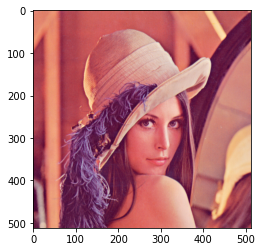

In [ ]:
image = mpimg.imread(filename)

plt.imshow(image)

In [ ]:
#konvolusi

# membuat filter: matriks berukuran 5 x 5 
kernel = np.ones((3,3),np.float32)/9
print(kernel)

[[0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]]


In [ ]:
# lakukan filtering
hasil_filter = cv.filter2D(image,-1,kernel)

show("Filter", hasil_filter)


In [ ]:
kernel = np.matrix([
          [1, 1, 1],
          [1, 2, 1],
          [1, 1, 1]         
          ])/25
hasil_filter = cv.filter2D(image,-1,kernel)

show("Filter", hasil_filter)

In [ ]:
filename = "salt_pepper.png"
url = "http://www.fit.vutbr.cz/~vasicek/imagedb/img_corrupted/impnoise_005/108073.png"

urllib.request.urlretrieve(url, filename)

('salt_pepper.png', <http.client.HTTPMessage at 0x12cd5f640>)

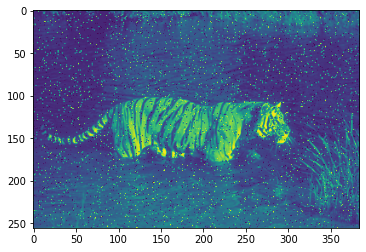

In [ ]:
image = mpimg.imread(filename)

plt.imshow(image)

In [ ]:
kernel = np.ones((3,3),np.float32)/9 #averaging filter
hasil_filter = cv.filter2D(image,-1,kernel)

show("Filter", hasil_filter)

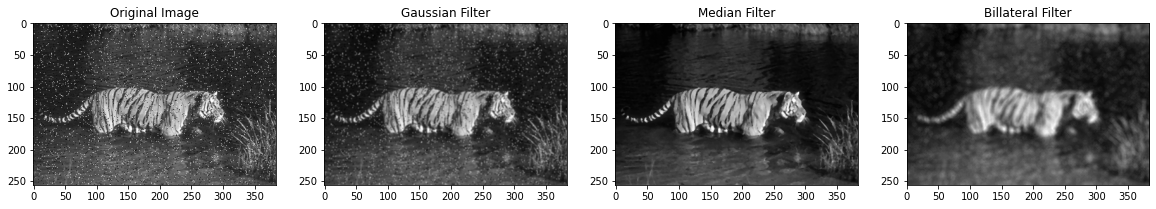

In [ ]:
Gaussian = cv.GaussianBlur(image,(3,3),0)
Median = cv.medianBlur(image,3)
Billateral = cv.bilateralFilter(image,9,75,75)

plt.figure(figsize=(20, 20), constrained_layout=False)
plt.subplot(141), plt.imshow(image, "gray"), plt.title("Original Image")
plt.subplot(142), plt.imshow(Gaussian, "gray"), plt.title("Gaussian Filter")
plt.subplot(143), plt.imshow(Median, "gray"), plt.title("Median Filter")
plt.subplot(144), plt.imshow(Billateral, "gray"), plt.title("Billateral Filter")
plt.show()